## Мини-задача для семинара (русский)

1) Возьмите фрагмент русского романа (например, 30–100k символов).
2) Сравните частоты **по токенам**, **по стеммам**, **по леммам**:
   - Как меняются топ-20?
   - Как меняется доля “длинного хвоста” (≤3) по **types**?
3) Выберите 5 предложений и сравните:
   - POS/DEP/NER от `spaCy`
   - леммы от `pymorphy3`
4) Составьте список имен персонажей
5) Найдите как можно больше предложений, где здороваются


In [14]:
!pip -q install spacy==3.7.5  nltk
!python -m spacy download ru_core_news_sm -q
!pip -q install pymorphy3 pymorphy3-dicts-ru
!pip -q install pandas


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[+] Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
with open('NLP.txt', 'r') as f:
    text=f.read()
text = text[580:300580]

In [10]:
import re
ru_tokens = re.findall(r"[А-Яа-яЁё]+(?:-[А-Яа-яЁё]+)?", text.lower())
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download("punkt", quiet=True)
stemmer = SnowballStemmer("russian")

stems = [stemmer.stem(w) for w in ru_tokens]

In [12]:
import pymorphy3
morph = pymorphy3.MorphAnalyzer()

lemmas = [morph.parse(w)[0].normal_form for w in ru_tokens]

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
def freq(cnt, V_types, N_tokens):
    
    top20 = cnt.most_common(20)
    df_top20 = pd.DataFrame(top20, columns=["word","count"])
    plt.figure(figsize=(10,4))
    plt.bar(df_top20["word"], df_top20["count"])
    plt.title("Топ-20 слов по частоте")
    plt.xlabel("Слово")
    plt.ylabel("Частота")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    
    tail_words = [w for w, c in cnt.items() if c <= 3]
    tail_types = len(tail_words)
    tail_tokens = sum(cnt[w] for w in tail_words)
    
    print(f"Tokens (всего словоупотреблений): {N_tokens:,}")
    print(f"Types  (уникальных слов):        {V_types:,}")
    print(f"Хвост (c<=3): {tail_types} типов = {tail_types/V_types:.1%} словаря")
    print(f"Хвост (c<=3): {tail_tokens} токенов = {tail_tokens/N_tokens:.1%} текста")

TOKENS


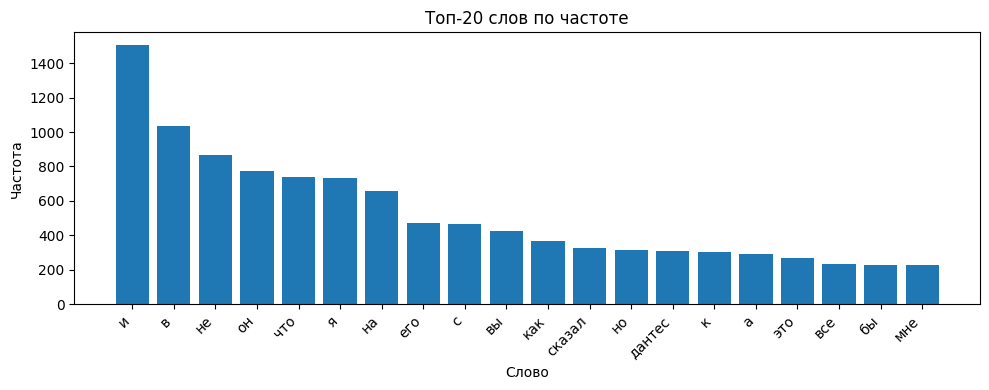

Tokens (всего словоупотреблений): 45,403
Types  (уникальных слов):        10,927
Хвост (c<=3): 9380 типов = 85.8% словаря
Хвост (c<=3): 12272 токенов = 27.0% текста


In [35]:
from collections import Counter
print("TOKENS")
a = Counter(ru_tokens)
freq(Counter(a), len(a), sum(a.values()))

STEMS


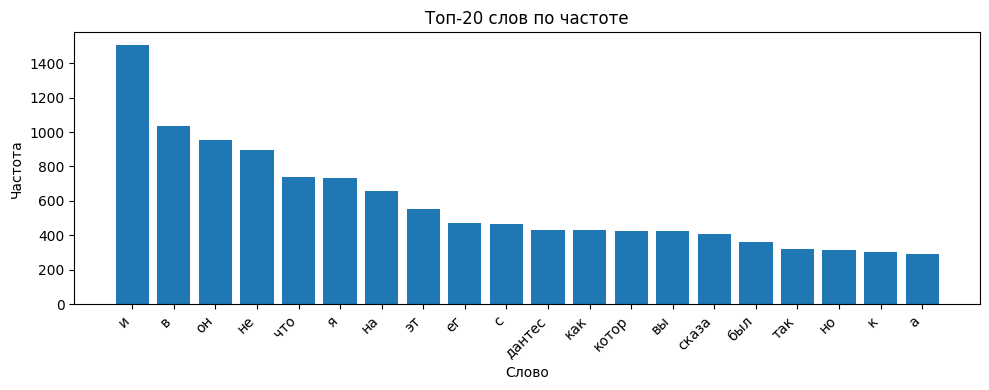

Tokens (всего словоупотреблений): 45,403
Types  (уникальных слов):        5,963
Хвост (c<=3): 4356 типов = 73.1% словаря
Хвост (c<=3): 6265 токенов = 13.8% текста


In [36]:
print("STEMS")
a = Counter(stems)
freq(Counter(a), len(a), sum(a.values()))

LEMMAS


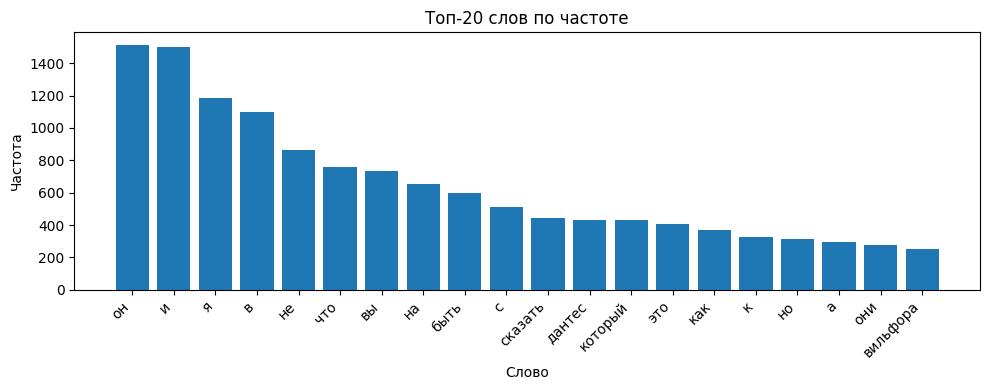

Tokens (всего словоупотреблений): 45,403
Types  (уникальных слов):        5,843
Хвост (c<=3): 4293 типов = 73.5% словаря
Хвост (c<=3): 6219 токенов = 13.7% текста


In [37]:
print("LEMMAS")
a = Counter(lemmas)
freq(Counter(a), len(a), sum(a.values()))

Итого видно, что ТОП-20 изменяется - по токенам и стеммам он практически одинаков, однако разительно отличается от варианта по леммам.
Доля длинного хвоста по типам уменьшилась при переходе от токенов к стеммам и леммам. При этом результат для стемм и лемм практически идентичный(73.1 для стемм и 73.5 для лемм).

In [38]:
sentences = "Хоть она тосковала и плакала не о нем, но ей показалось, что часть ее прежней жизни вернулась к ней. Мерседес схватила Фернана за руки с такой радостью, что он принял ее за любовь; но это была только радость от мысли, что она не одна на свете и что наконец после долгих дней одиночества видит перед собой друга. И притом надобно сказать, что Фернан никогда не внушал ей отвращения; он не внушал ей любви, только и всего. Сердце Мерседес принадлежало другому, этот другой был далеко… исчез… умер, быть может. При этой мысли Мерседес рыдала и в отчаянии ломала руки."
print(sentences)

Хоть она тосковала и плакала не о нем, но ей показалось, что часть ее прежней жизни вернулась к ней. Мерседес схватила Фернана за руки с такой радостью, что он принял ее за любовь; но это была только радость от мысли, что она не одна на свете и что наконец после долгих дней одиночества видит перед собой друга. И притом надобно сказать, что Фернан никогда не внушал ей отвращения; он не внушал ей любви, только и всего. Сердце Мерседес принадлежало другому, этот другой был далеко… исчез… умер, быть может. При этой мысли Мерседес рыдала и в отчаянии ломала руки.


In [54]:
import spacy
nlp = spacy.load("ru_core_news_sm")
doc = nlp(sentences)

In [55]:
rows = []
for t in doc:
    if t.is_space:
        continue
    rows.append([t.text, t.lemma_, t.pos_, t.tag_, t.morph.to_json()])
pd.DataFrame(rows, columns=["token","lemma","POS","TAG","morph"])

,token,lemma,POS,TAG,morph
0,Хоть,хоть,SCONJ,SCONJ,
1,она,она,PRON,PRON,Case=Nom|Gender=Fem|Number=Sing|Person=Third
2,тосковала,тосковать,VERB,VERB,Aspect=Imp|Gender=Fem|Mood=Ind|Number=Sing|Ten...
3,и,и,CCONJ,CCONJ,
4,плакала,плакать,VERB,VERB,Aspect=Imp|Gender=Fem|Mood=Ind|Number=Sing|Ten...
...,...,...,...,...,...
110,в,в,ADP,ADP,
111,отчаянии,отчаяние,NOUN,NOUN,Animacy=Inan|Case=Loc|Gender=Neut|Number=Sing
112,ломала,ломать,VERB,VERB,Aspect=Imp|Gender=Fem|Mood=Ind|Number=Sing|Ten...
113,руки,рука,NOUN,NOUN,Animacy=Inan|Case=Acc|Gender=Fem|Number=Plur


In [56]:
dep_rows = []
for t in doc:
    if t.is_space:
        continue
    dep_rows.append([t.text, t.dep_, t.head.text])
pd.DataFrame(dep_rows, columns=["token","dep","head"])

,token,dep,head
0,Хоть,mark,тосковала
1,она,nsubj,тосковала
2,тосковала,ROOT,тосковала
3,и,cc,плакала
4,плакала,conj,тосковала
...,...,...,...
110,в,case,отчаянии
111,отчаянии,obl,ломала
112,ломала,conj,рыдала
113,руки,obj,ломала


In [57]:
from spacy import displacy
displacy.render(doc, style="dep", jupyter=True, options={"distance": 90})

In [58]:
[ent.text for ent in doc.ents]

['Мерседес', 'Фернана', 'Фернан', 'Мерседес', 'Мерседес']

In [68]:
import re
import pymorphy3

ru_tokens = re.findall(r"[А-Яа-яЁё]+(?:-[А-Яа-яЁё]+)?", sentences.lower())
morph = pymorphy3.MorphAnalyzer()
ru_lemmas_pym = [morph.parse(w)[0].normal_form for w in ru_tokens]

In [70]:
print(list(zip([t.lemma_ for t in doc if t.is_alpha], ru_lemmas_pym)))

[('хоть', 'хоть'), ('она', 'она'), ('тосковать', 'тосковать'), ('и', 'и'), ('плакать', 'плакать'), ('не', 'не'), ('о', 'о'), ('нем', 'немой'), ('но', 'но'), ('ей', 'она'), ('показаться', 'показаться'), ('что', 'что'), ('часть', 'часть'), ('она', 'она'), ('прежний', 'прежний'), ('жизнь', 'жизнь'), ('вернуться', 'вернуться'), ('к', 'к'), ('ней', 'она'), ('мерседес', 'мерседес'), ('схватить', 'схватить'), ('фернан', 'фернан'), ('за', 'за'), ('рука', 'рука'), ('с', 'с'), ('такой', 'такой'), ('радость', 'радость'), ('что', 'что'), ('он', 'он'), ('принять', 'принять'), ('ее', 'она'), ('за', 'за'), ('любовь', 'любовь'), ('но', 'но'), ('это', 'это'), ('быть', 'быть'), ('только', 'только'), ('радость', 'радость'), ('от', 'от'), ('мысль', 'мысль'), ('что', 'что'), ('она', 'она'), ('не', 'не'), ('одна', 'один'), ('на', 'на'), ('свет', 'свет'), ('и', 'и'), ('что', 'что'), ('наконец', 'наконец'), ('после', 'после'), ('долгий', 'долгий'), ('день', 'день'), ('одиночество', 'одиночество'), ('видеть', 

Составим список имен персонажей

In [88]:
nlp = spacy.load("ru_core_news_sm")
doc = nlp(text)

In [89]:
{ent.text for ent in doc.ents if ent.label_ == "PER"}

{'Аббат Фариа',
 'Александра Шестого',
 'Александре Шестом',
 'Аминь',
 'Антуан',
 'Арестуете',
 'Арколи',
 'Архимед',
 'Ах',
 'Барон',
 'Бегу',
 'Бедняга Фернан',
 'Берегитесь',
 'Блакас',
 'Блакасу',
 'Бонапарт',
 'Бонапарта',
 'Бонапартом',
 'Брут',
 'Брюнет',
 'Бурбонах',
 'Бурбоны',
 'Ватерлоо',
 'Венеры Арльской',
 'Вергилий',
 'Верно',
 'Вильфор',
 'Вильфор Дантесу',
 'Вильфора',
 'Вильфором',
 'Вильфору',
 'Гам',
 'Говорите',
 'Горький',
 'Господина де Вильфора',
 'Господину Нуартье',
 'Гофман',
 'Граф Сальвьё',
 'Гренобль',
 'Грифиуса',
 'Данглар',
 'Данглар Кадруссу',
 'Данглар Фернана',
 'Данглар Фернану',
 'Данглара',
 'Дангларом',
 'Данглару',
 'Данглару Кадрусс',
 'Дандре',
 'Дантес',
 'Дантеса',
 'Дантесами',
 'Дантесе',
 'Дантесом',
 'Дантесу',
 'Дверца',
 'Де Блакас',
 'Декарта',
 'Дорогой Блакас',
 'Дофине',
 'Жандарм',
 'Жарос',
 'Женой',
 'Жерар',
 'Жерар де Вильфор',
 'Жерару',
 'Жермен',
 'Жозефиной',
 'Завидев Вильфора',
 'Здоров',
 'Знаешь',
 'Идите',
 'Иду',
 '

Найдем предложения с приветствиями

In [99]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

greet_patterns = [
    [{"LOWER": {"IN": ["привет", "здравствуйте", "здравствуй", "здрасте", "здарова"]}}],
    [{"LOWER": "добрый"}, {"LOWER": "день"}],
    [{"LOWER": "доброе"}, {"LOWER": "утро"}],
    [{"LOWER": "добрый"}, {"LOWER": "вечер"}],
]

matcher.add("GREET", greet_patterns)

def greet_sentence(doc):
    matches = matcher(doc)

    spans = [doc[start:end] for match_id, start, end in matches]

    greeting_sentences = set()
    for span in spans:
        sent = span.sent
        greeting_sentences.add(sent.text.strip())
    
    return list(greeting_sentences)
    
print(greet_sentence(doc))

['– Здравствуйте, – сказал он, – вы, кажется, звали меня?', 'Здравствуйте, госпожа Дантес!']
